In [10]:
import pandas as pd

df_a = pd.read_csv('A kişisinin verileri.csv')
df_urun = pd.read_csv('Ürünler.csv')
df_veri = pd.read_csv('Veri Tabanı.csv')
df_a.head()

,Ekran,Hafiza,Kamera,Bakma_Sirasi
0,115,52,98,123
1,5,84,18,132
2,106,74,89,213
3,39,62,39,231
4,101,77,69,312


In [7]:
df_urun.head()

,Isim,Ekran_Puan,Hafiza_Puan,Kamera_Puan,Fiyat
0,A,68,25,83,16784
1,B,49,76,91,23658
2,C,92,41,14,19939
3,D,12,87,50,11743
4,E,77,19,60,21876


In [8]:
df_veri.head()

,Isim,Ekran,Hafiza,Kamera,Bakma_Sirasi
0,John,117,12,53,123
1,Emma,73,56,96,132
2,Liam,95,67,49,213
3,Olivia,37,18,91,231
4,Noah,89,19,17,312


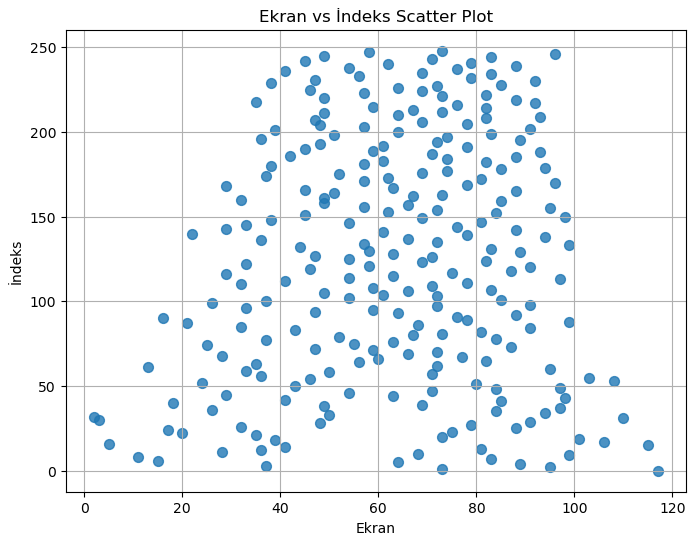

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# "Ekran" sütununu x ekseni, indeksleri y ekseni olarak kullanma
x = df_veri['Ekran']
y = df_veri.index

# Scatter plot oluşturma
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=50, alpha=0.8)

# Eksen başlıkları ve başlık ekleme
plt.xlabel('Ekran')
plt.ylabel('İndeks')
plt.title('Ekran vs İndeks Scatter Plot')

# Gridlines ekleme
plt.grid(True)

In [13]:
# Yapay Sinir Ağları
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# gereksiz uyarıları kapatalım
import warnings
warnings.filterwarnings('ignore')

# derin öğrenmede keras kullanacağız ama sklearn bize test eğitim bölünmesinde yardım edecek
from sklearn.model_selection import train_test_split

In [20]:
import pandas as pd
import sqlite3

# SQLite veritabanına bağlan
conn = sqlite3.connect('database.db')

ekran_avg = df_veri['Ekran'].mean()

hafiza_avg = df_veri['Hafiza'].mean()

kamera_avg = df_veri['Kamera'].mean()

print(f"Ekrana ortalama bakma değeri: {ekran_avg}")

print(f"Hafızaya ortalama bakma değeri: {hafiza_avg}")

print(f"Kameraya ortalama bakma değeri: {kamera_avg}")


# Veritabanı bağlantısını kapat
conn.close()

Ekrana ortalama bakma değeri: 63.40963855421687
Hafızaya ortalama bakma değeri: 64.83132530120481
Kameraya ortalama bakma değeri: 70.36144578313252


In [21]:
df_urun['Ekran_Siralama'] = df_urun['Ekran_Puan'] * ekran_avg / 120

df_urun['Hafiza_Siralama'] = df_urun['Hafiza_Puan'] * hafiza_avg / 120

df_urun['Kamera_Siralama'] = df_urun['Kamera_Puan'] * kamera_avg / 120

df_urun.to_csv('Değerlendirilmiş Ürünler.csv', index=False)

In [40]:
sira_sutunu = 'Ekran_Siralama'

df_urun_siralama = df_urun.sort_values(by=sira_sutunu, ascending = False)

df_urun_siralama.to_csv('siralanmis_urunler.csv', index=False)
df_urun_siralama.head()

,Isim,Ekran_Puan,Hafiza_Puan,Kamera_Puan,Fiyat,Ekran_Siralama,Hafiza_Siralama,Kamera_Siralama
22,W,97,88,84,29995,51.256124,47.542972,49.253012
11,L,95,84,79,29320,50.199297,45.381928,46.321285
2,C,92,41,14,19939,48.614056,22.150703,8.208835
15,P,89,63,31,18425,47.028815,34.036446,18.176707
7,H,85,72,72,27819,44.915161,38.898795,42.216867


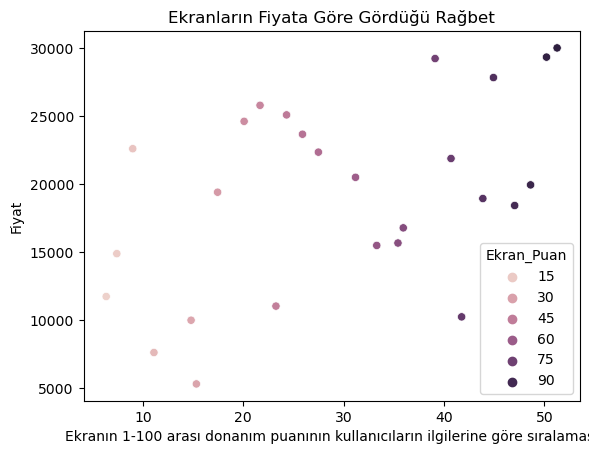

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
renk = df_urun_siralama['Ekran_Puan']
sns.scatterplot(x='Ekran_Siralama', y='Fiyat', hue= renk , data=df_urun_siralama)
plt.xlabel('Ekranın 1-100 arası donanım puanının kullanıcıların ilgilerine göre sıralaması')
plt.ylabel('Fiyat')
plt.title('Ekranların Fiyata Göre Gördüğü Rağbet')

plt.show()

In [32]:
import pandas as pd
import sqlite3

# SQLite veritabanına bağlan
conn = sqlite3.connect('database.db')

a_ekran_avg = df_a['Ekran'].mean()

a_hafiza_avg = df_a['Hafiza'].mean()

a_kamera_avg = df_a['Kamera'].mean()

print(f"A kişisinin ekrana ortalama bakma değeri: {a_ekran_avg}")

print(f"A kişisinin hafızaya ortalama bakma değeri: {a_hafiza_avg}")

print(f"A kişisnin kameraya ortalama bakma değeri: {a_kamera_avg}")


# Veritabanı bağlantısını kapat
conn.close()

A kişisinin ekrana ortalama bakma değeri: 58.94827586206897
A kişisinin hafızaya ortalama bakma değeri: 60.5
A kişisnin kameraya ortalama bakma değeri: 63.87931034482759


In [41]:
df_a['Ekran_Siralama'] = df_a['Ekran'] * a_ekran_avg / 120

df_a['Hafiza_Siralama'] = df_a['Hafiza'] * a_hafiza_avg / 120

df_a['Kamera_Siralama'] = df_a['Kamera'] * a_kamera_avg / 120

df_a.to_csv('A Kişisine Göre Değerlendirilmiş Ürünler.csv', index=False)

In [50]:
ekran_siralama = 'Ekran_Siralama'
hafiza_siralama = 'Hafiza_Siralama'
kamera_siralama = 'Kamera_Siralama'
df_urun_ekran_siralama = df_urun.sort_values(by=ekran_siralama, ascending = False)
df_urun_hafiza_siralama = df_urun.sort_values(by=hafiza_siralama, ascending = False) 
df_urun_kamera_siralama = df_urun.sort_values(by=kamera_siralama, ascending = False)

if a_ekran_avg >= a_hafiza_avg and a_ekran_avg >= a_kamera_avg:
    
    a = 1
    b = 0
    c = 0
    
elif a_hafiza_avg >= a_ekran_avg and a_hafiza_avg >= a_kamera_avg:

    a = 0
    b = 1
    c = 0
    
else:

    a = 0
    b = 0
    c = 1


In [53]:
if a == 1:
    print(df_urun_ekran_siralama.head())
elif b == 1:
    print(df_urun_hafiza_siralama.head())
else:
    print(df_urun_kamera_siralama.head())

   Isim  Ekran_Puan  Hafiza_Puan  Kamera_Puan  Fiyat  Ekran_Siralama  \
14    O          17           52           98  22596        8.983032   
23    X          46           65           97  25078       24.307028   
8     I          74           56           95  29215       39.102610   
1     B          49           76           91  23658       25.892269   
13    N          41           11           89  25781       21.664960   

    Hafiza_Siralama  Kamera_Siralama  
14        28.093574        57.461847  
23        35.116968        56.875502  
8         30.254618        55.702811  
1         41.059839        53.357430  
13         5.942871        52.184739  
